https://codetorial.net/tensorflow/get_attribute_of_neuron_layers.html

6. 뉴런층의 속성 확인하기
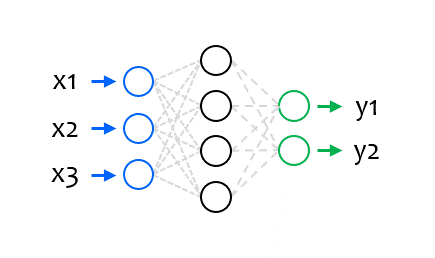

tf.keras.layers.Layer는 Neural Network의 모든 레이어 객체가 상속하는 클래스
tf.keras.layers.Layer의 다양한 속성 (Attribute)을 이용해서 각 레이어에 대한 정보를 확인하는 것이 목적

1. 뉴런층의 이름 (name)과 자료형 (dtype)
2. 뉴런층의 입력 (input)과 출력 (output)
3. 뉴런층의 활성화함수 (activation)
4. 뉴런층의 가중치 (weights)
5. get_weights() 메서드

In [1]:
# 1. 뉴런층의 이름 (name)과 자료형 (dtype)
import tensorflow as tf

tf.random.set_seed(0)

# 1. 뉴런층 만들기
#  input은 3개의 unit, 중간층은 4개이며 relu로 구성, 출력은 2개이며 softmax 
input_layer = tf.keras.layers.InputLayer(input_shape=(3,))
hidden_layer = tf.keras.layers.Dense(units=4, activation='relu')
output_layer = tf.keras.layers.Dense(units=2, activation='softmax')

In [2]:
# 2. 모델 구성하기
model = tf.keras.Sequential([
    input_layer,
    hidden_layer,
    output_layer
    ])


# 3. 모델 컴파일하기
model.compile(loss='mse', optimizer='Adam')


# 4. 뉴런층의 이름과 자료형
# # name은 뉴런층의 이름, dtype은 뉴런층의 연산과 웨이트 값에 사용되는 자료형
print(input_layer.name, input_layer.dtype)
print(hidden_layer.name, hidden_layer.dtype)
print(output_layer.name, output_layer.dtype)

# 실행 결과가 아래와 같이 나온다.

# input_1 float32
# dense float32
# dense_1 float32

input_1 float32
dense float32
dense_1 float32


In [3]:
print(len(model.layers))

print(model.layers[0].name) # hidden
print(model.layers[1].name) # output
print(model.layers[2].name) # 에러 발생

2
dense
dense_1


IndexError: list index out of range

에러는 어째서 발생할까?
model.layers는 구성한 Neural Network 모델의 (입력층을 제외한) 뉴런층 레이어 객체를 리스트의 형태로 반환

model.layers[0]은 모델의 첫번째 뉴런층, 즉 은닉층 (hidden layer)입니다.

model.layers[1]은 모델의 두번째 뉴런층, 즉 출력층 (output_layer)입니다.

모델이 (입력층을 제외한) 두 개의 뉴런층을 포함하기 때문에

model.layers[2].name을 출력하면 에러를 발생
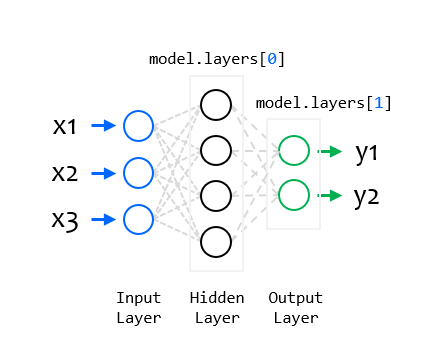

In [4]:
# 2. 뉴런층의 입력 (input)과 출력 (output)
print(input_layer.input)
print(input_layer.output)

print(hidden_layer.input)
print(hidden_layer.output)

print(hidden_layer.input.shape)
print(hidden_layer.output.shape)

print(output_layer.input)
print(output_layer.output)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")
(None, 3)
(None, 4)
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")
KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='dense_1/Softmax:0', description="created by layer 'dense_1'")


In [5]:
# Tensor("input_1:0", shape=(None, 3), dtype=float32)
# Tensor("input_1:0", shape=(None, 3), dtype=float32)
# Tensor("input_1:0", shape=(None, 3), dtype=float32)
# Tensor("dense/Identity:0", shape=(None, 4), dtype=float32)
# (None, 3)
# (None, 4)
# Tensor("dense/Identity:0", shape=(None, 4), dtype=float32)
# Tensor("dense_1/Identity:0", shape=(None, 2), dtype=float32)

# input은 뉴런층의 입력 텐서 (input tensor)입니다.

# output은 뉴런층의 출력 텐서 (output tensor)입니다.

# 은닉층 (hidden_layer)의 입력과 출력의 형태 (shape)를 출력해보면

# 입력 텐서는 길이 3의 형태, 출력 텐서는 길이 4의 형태를 가짐을 알 수 있습니다.

# 예를 들어, (None, 3)은 길이 3의 벡터의 시퀀스형태가 될 수 있음을 의미합니다.

In [6]:
#3. 뉴런층의 활성화함수 (activation)
# activation은 뉴런 노드의 활성화함수 (Activation function)를 나타냅니다.
# __name__을 사용해서 활성화함수의 이름을 출력했습니다
print(hidden_layer.activation)
print(hidden_layer.activation.__name__)
print(output_layer.activation)
print(output_layer.activation.__name__)

<function relu at 0x00000264AD431EE0>
relu
<function softmax at 0x00000264AD4314C0>
softmax


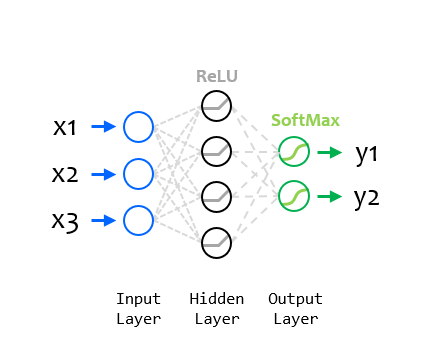

In [7]:
# 4. 뉴런층의 가중치 (weights)
# weights를 사용해서 각 뉴런층의 시냅스 가중치에 대한 정보를 얻는다.
print(hidden_layer.weights)
print(output_layer.weights)

[<tf.Variable 'dense/kernel:0' shape=(3, 4) dtype=float32, numpy=
array([[-0.3851872 , -0.54333335,  0.0655309 ,  0.1134268 ],
       [-0.15428883,  0.5699866 , -0.01254469,  0.9223561 ],
       [ 0.36428273, -0.6936733 ,  0.38850498,  0.30073535]],
      dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>]
[<tf.Variable 'dense_1/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.11082816, -0.55741405],
       [ 0.7298498 ,  0.5545671 ],
       [ 0.29023337,  0.0607245 ],
       [-0.971118  ,  0.74701834]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]


In [8]:
# 5. get_weights() 메서드를 사용하면 시냅스 가중치를 NumPy 어레이 형태로 얻을 수 있다.
print(hidden_layer.get_weights())
print(output_layer.get_weights())

[array([[-0.3851872 , -0.54333335,  0.0655309 ,  0.1134268 ],
       [-0.15428883,  0.5699866 , -0.01254469,  0.9223561 ],
       [ 0.36428273, -0.6936733 ,  0.38850498,  0.30073535]],
      dtype=float32), array([0., 0., 0., 0.], dtype=float32)]
[array([[ 0.11082816, -0.55741405],
       [ 0.7298498 ,  0.5545671 ],
       [ 0.29023337,  0.0607245 ],
       [-0.971118  ,  0.74701834]], dtype=float32), array([0., 0.], dtype=float32)]


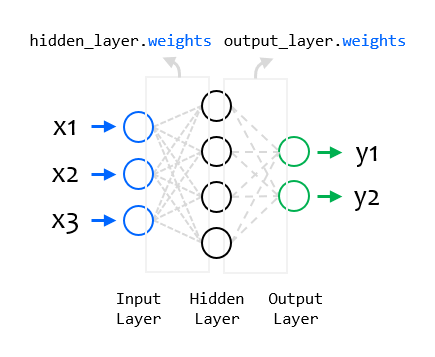

In [9]:
# 결과1 : 다층 퍼셉트론 신경망에서 사용되는 레이어에서 각 연결선은 가중치를 가지고 있다.
# 결과2 : 가중치가 높을 수록 해당 입력 뉴런이 출력 뉴런에 미치는 영향이 크고, 낮을수록 미치는 영향이 작다
# 결과3 : 각 가중치는 해당되는 입력에서 특정 출력까지 도달할 확률을 높여준다. 
# 의심1 : 편향(bias)와 가중치는 무엇이 다른가?
    # 편향은 이미 나온 답에 + 상수값을 더해주는 것
    # 가중치는 특정 값이 가중치를 곱한 확률만큼 자주 나오게 하는 것
    # 특정 출력으로 가는 확률 = 가중치 * x
    # 즉 x1 * weight + bias = y1 


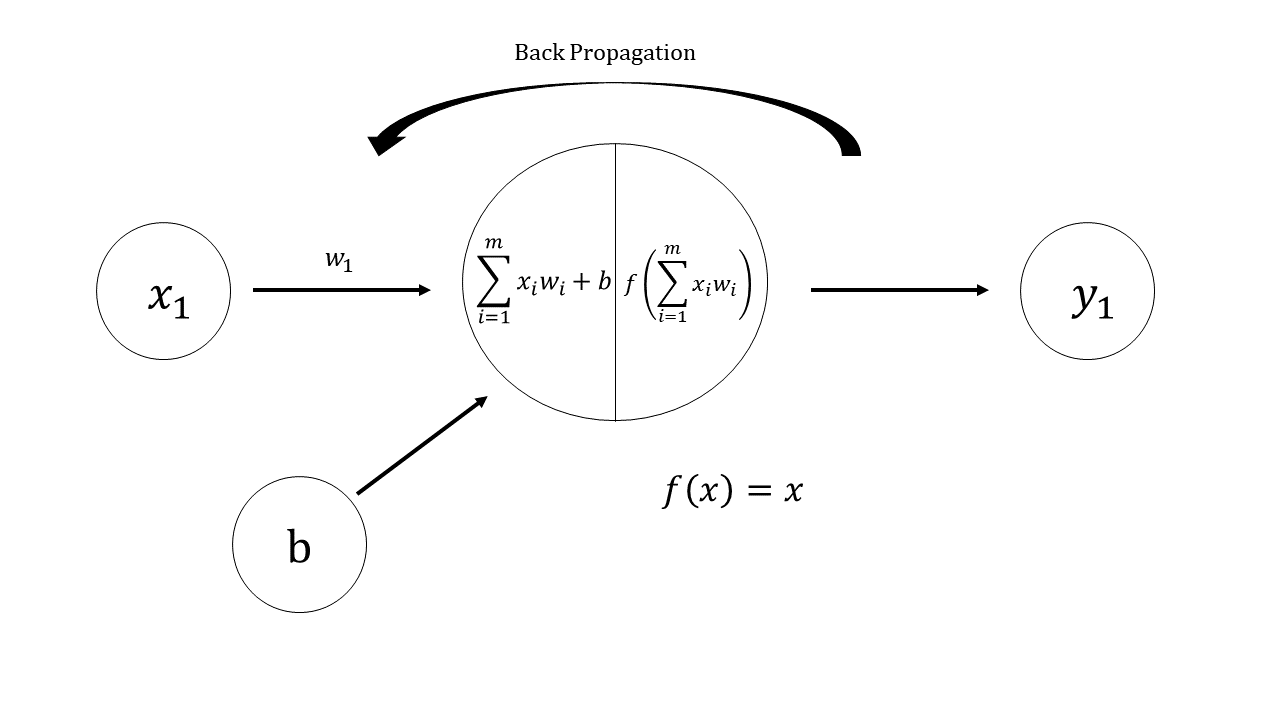

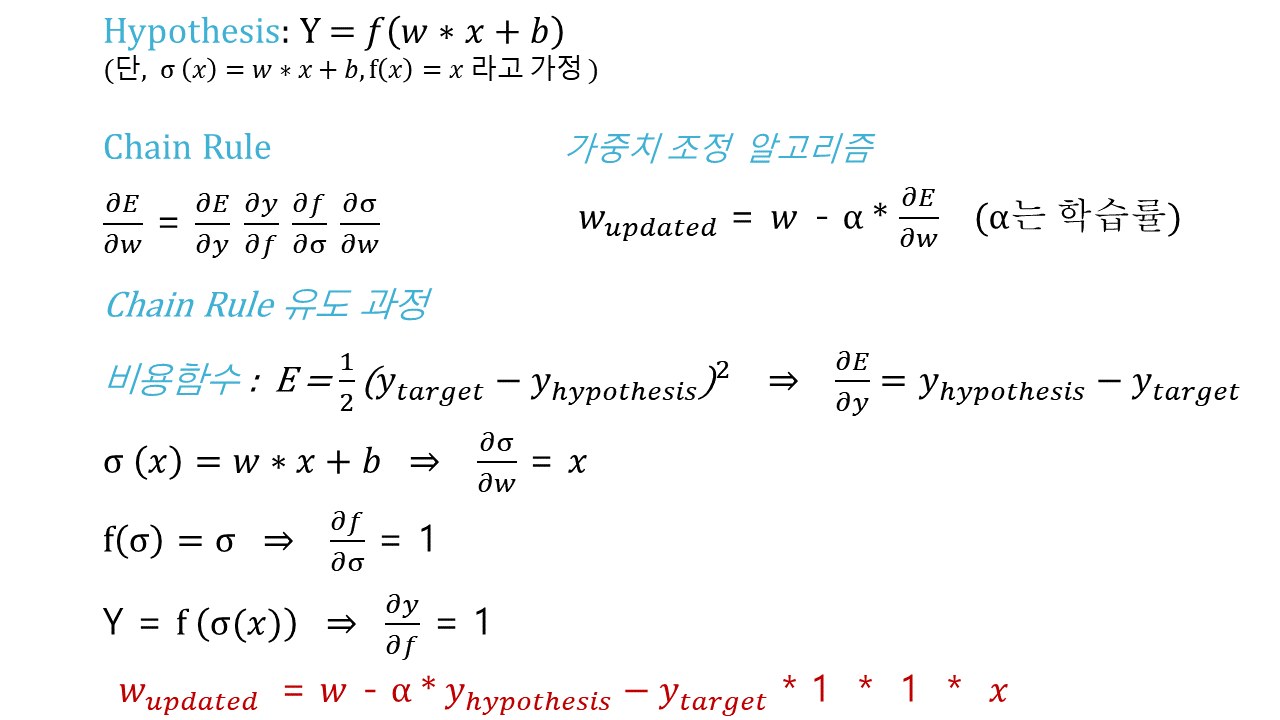